#Uygulama 2: Lojistik Regresyon Analizi

**Veri seti hakkında bilgi**<br>
MNIST veri kümesi, makine öğrenimi ve yapay zeka alanında sık kullanılan bir veri kümesidir. Bu veri kümesi, el yazısı rakamların (0-9) siyah-beyaz görüntülerini içerir. Veri kümesinde 60,000 eğitim örneği ve 10,000 test örneği vardır.

MNIST veri kümesi, özellikle görüntü sınıflandırması problemlerinde kullanılır. Veri kümesindeki görüntüler, 28x28 piksellik boyutlara sahiptir ve her piksel, 0 ile 255 arasında bir gri ton değeri ile temsil edilir. Her görüntü, hangi rakamı temsil ettiği hedef değişkeni (etiket) ile eşleştirilir.

MNIST veri kümesi, makine öğrenimi modellerini eğitmek ve test etmek için kullanılabilecek standart bir veri kümesidir. Bu veri kümesi, özellikle derin öğrenme modelleri gibi büyük ve karmaşık modeller için de kullanışlıdır. Ayrıca, veri kümesi hakkında çok sayıda makale ve araştırma yazısı yayınlanmıştır, bu nedenle MNIST veri kümesi, makine öğrenimi topluluğu tarafından yaygın olarak kullanılan bir referans haline gelmiştir.


**Ön Hazırlık** 
*   Uyarıları kapatma

In [1]:
import warnings 
warnings.filterwarnings('ignore')

**1. Aşama: Veri Toplama**

In [2]:
from sklearn import datasets
# Girdi özellikleri ve hedef değişkeni ayrı yükleniyor
X, y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
print(X.head())
print(y.head())

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       

**2. Aşama: Veri Ön İşleme**

*   Veri setine dair istatistiki bilgilerin görüntülenmesi.

In [ ]:
print(X.describe())
print(X.info())

        pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7   pixel8  \
count  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel9  pixel10  ...      pixel775      pixel776      pixel777  \
count  70000.0  70000.0  ...  70000.000000  70000.000000  70000.000000   
mean       0.0      0.0  ...      0.197414      0.099543      0.046629   
std        0.0      0.0  ...      5.991206      

In [ ]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)



*   Örnek görselleştirme

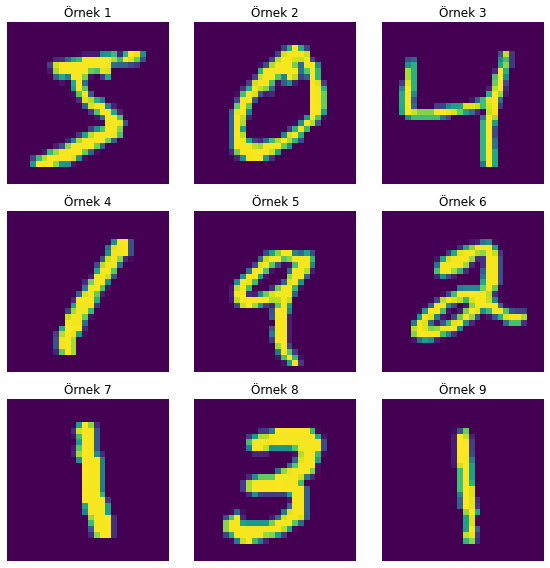

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# 9 örnek görselleştirme
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
for i, ax in enumerate(axes.flat):
    digit = X.iloc[i]
    digit_pixels = np.array(digit).reshape(28, 28)
    ax.imshow(digit_pixels)
    ax.set_axis_off()
    ax.set_title(f"Örnek {i+1}")
plt.tight_layout()
plt.show()

*   Veri setinin “Eğitim” ve “Test” verisi olarak bölünmesi.

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**3. Aşama: Model Oluşturma**

*   Lojistik regresyon modelini tanımlama ve eğitme

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

**4.Aşama : Model Değerlendirme**

*   Test verileri ile modeli değerlendirme.

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9165


*   Confusion Matrisi(Hata Matrisi)

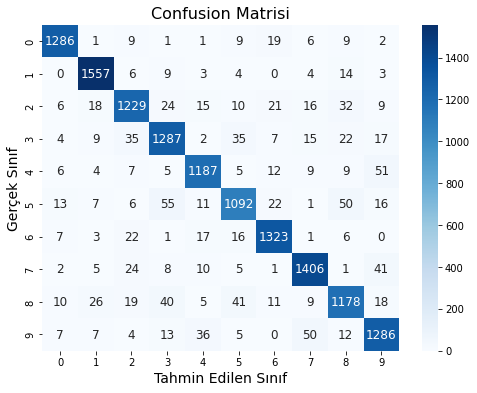

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# confusion matrisi hesaplama
cm = confusion_matrix(y_test, y_pred)

# confusion matrisini görselleştirme
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', ax=ax, fmt='d', annot_kws={"size": 12})
ax.set_xlabel('Tahmin Edilen Sınıf', fontsize=14)
ax.set_ylabel('Gerçek Sınıf', fontsize=14)
ax.set_title('Confusion Matrisi', fontsize=16)
plt.show()

**5.Aşama : Modeli Yayma**

*   Modeli yayma, kullanma

Saving Ornek2_2.png to Ornek2_2 (1).png
Saving Ornek5_2.png to Ornek5_2 (2).png
Saving Ornek6.PNG to Ornek6.PNG
Saving Ornek6_2.png to Ornek6_2 (1).png
Saving Ornek8.PNG to Ornek8.PNG
Saving OrnekResim.PNG to OrnekResim (3).PNG


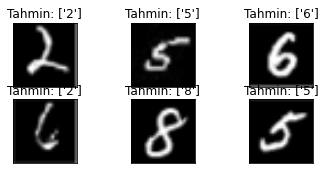

In [ ]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
uploaded_images = []
uploaded = files.upload()
for filename in uploaded.keys():
  img = Image.open(filename)
  img = img.resize((28, 28)) 
  img = img.convert('L')
  img_array = np.array(img).flatten() 
  img_array = img_array.reshape(1, -1)
  uploaded_images.append(img_array)
for plot_index, i in enumerate(range(len(uploaded_images))):
  prediction = lr.predict(uploaded_images[i])
  p = plt.subplot(3,3, plot_index+1) 
  p.imshow(uploaded_images[i].reshape(28,28), cmap=plt.cm.gray,interpolation='bilinear')
  p.set_xticks(()); p.set_yticks(())    
  p.set_title(f'Tahmin: {prediction}')

**Story dosyasına aktarılmayan bölüm.**

In [ ]:
#Dikkat bundan sonrası YOK
#pandas le data frame i csv olarak kaydetme
#Örnekler siyah zemin üzerie beyaz olmalı
import pandas as pd
df = pd.DataFrame(X)
df.to_csv('mnist_data.csv')
#Burası da yok
  img_array = np.array(img).flatten()
  img_array = img_array.reshape(1, -1) # boyutu 1,784 yapma 

In [ ]:
# Modeli Yayma
from google.colab import files
from PIL import Image
import numpy as np

# Yüklenen resimleri saklamak için bir liste oluşturma
uploaded_images = []

# Dosya seçme arayüzünü kullanarak resimleri yükleme
uploaded = files.upload()

# Yüklenen resimleri görüntüleme ve boyutunu değiştirme
for filename in uploaded.keys():
  img = Image.open(filename)
  img = img.resize((28, 28)) # MNIST veri setindeki boyutlara getirme
  img = img.convert('L')
  img_array = np.array(img)
  img_array = img_array.reshape(1, 784) # boyutu 1,784 yapma
  nrm_img_array=np.where(img_array > 128, 255, 0)
  uploaded_images.append(nrm_img_array)
print(len(uploaded_images))
# Yüklenen resimleri modelin tahmin etmesi
for i in range(len(uploaded_images)):
  prediction = lr.predict(uploaded_images[i])
  print('Resim', i+1, ' için Tahmin:', prediction)
